# Face Scrape ::  [bchao1/Anime-Face-Dataset](https://github.com/bchao1/Anime-Face-Dataset)

```
input::image-{any-size} -> Service::FaceScrape -> output::image-{crop-faces-area}
```

### 3-rd Party Code
```bash
!mkdir -p third-party \
    && cd third-party \
    && git clone https://github.com/bchao1/Anime-Face-Dataset.git
```

In [106]:
from pathlib import Path

input_dir = Path('anime-character-input')
output_dir = Path('anime-character-output')

input_img = 'Maho_Kazami.jpg'
input_img_path = input_dir / input_img

In [107]:
import cv2
import matplotlib.pyplot as plt

In [108]:
def show_image(image):
    # SEE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88?permalink_comment_id=5082506#gistcomment-5082506
    if isinstance(image, (str, Path)):
        image = cv2.imread(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

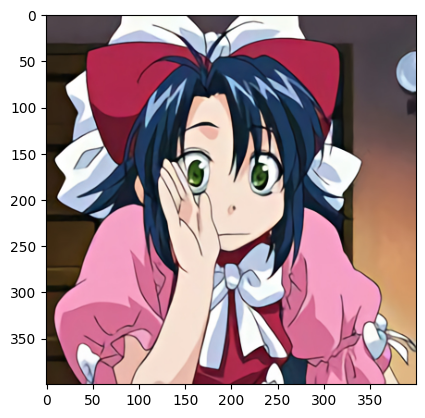

In [109]:
show_image(input_img_path)

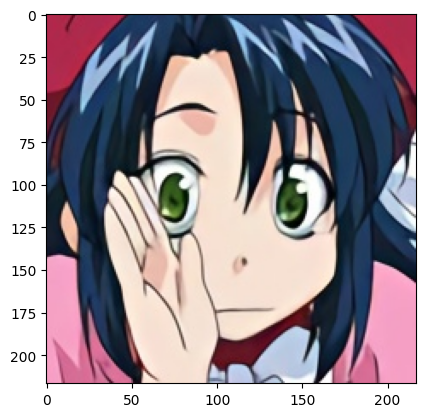

In [116]:
import cv2
import sys
import os
import os.path
import shutil

cascade_file = "./third-party/Anime-Face-Dataset/src/lbpcascade_animeface.xml"

def detect(filename, outname, cascade_file=cascade_file):
    if not os.path.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = cascade.detectMultiScale(gray,
                                     # detector options
                                     scaleFactor = 1.1,
                                     minNeighbors = 5,
                                     minSize = (24, 24))
    if len(faces) > 0:
        x, y, w, h = faces[0]
        #print(x, y, w, h)
        cv2.imwrite(outname, image[int(y-0.1*h): int(y+0.9*h), x: x+w])
        return True
    else:
        return False

ct = 0
output_img = output_dir / f"1-{input_img}"
if detect(input_img_path, output_img):
    show_image(output_img)

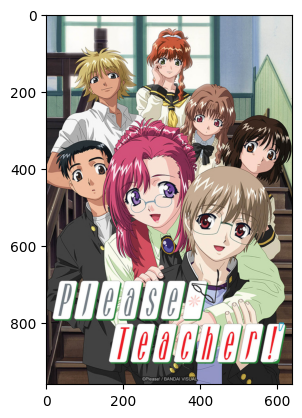

In [117]:
input_img_many = 'Please_Teacher.jpg'
input_img_many_path = input_dir / input_img_many
show_image(input_img_many_path)

In [118]:
def show_many_image(images):
    # SEE: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/
    fig = plt.figure(figsize=(10, 7))
    for idx, image_name in enumerate(images, start=1):
        image = cv2.imread(output_dir / image_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        fig.add_subplot(2, 4, idx)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)

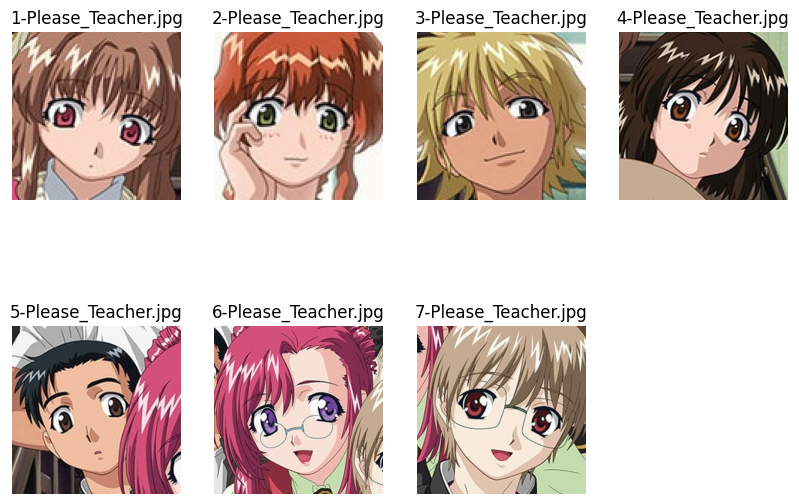

In [119]:
def detect_many(filename, outname, cascade_file=cascade_file):
    if not os.path.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = cascade.detectMultiScale(gray,
                                     # detector options
                                     scaleFactor = 1.1,
                                     # NOTE: changed this part `n=5` -> `n=1`
                                     minNeighbors = 1,
                                     minSize = (25, 25))
    images = []
    for fid, face in enumerate(faces, start=1):
        x, y, w, h = face
        outname_img = f"{fid}-{outname}"
        outname_idx = output_dir / outname_img
        images.append(outname_img)
        cv2.imwrite(outname_idx, image[int(y-0.1*h): int(y+0.9*h), x: x+w])
    return images

images = detect_many(input_img_many_path, input_img_many)
show_many_image(images)